In [187]:
import os
os.getcwd()

'C:\\Users\\hei79524\\Documents\\Coding Learning\\datasets'

In [188]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

# 1. Import dataset

In [189]:
# read CSV file
data = pd.read_csv('badminton_data_model_predictive_inputs.csv', index_col=0)

# display the first 5 rows
data.head()

,RankDifference,HeadToHeadDifference,DifferenceDurationToDateVsOpponent,DifferenceDurationInLastYear,DifferenceDurationOnCourtThisTournament,DifferenceMatchesInLastYear,DifferenceTournamentsInLastYear,MatchResult
MatchAthleteID,,,,,,,,
128_P1,13,0,-3566.0,-1517.0,NaN,-33.0,-16.0,Lost
142_P1,11,0,-4695.0,-36.0,12.0,-4.0,5.0,Lost
168_P1,11,0,-7899.0,189.0,-3.0,3.0,1.0,Lost
183_P1,110,0,-6164.0,-1111.0,NaN,-20.0,-11.0,Lost
192_P1,588,0,-731.0,-312.0,NaN,-7.0,-6.0,Lost


Text(0.5, 1, 'After')

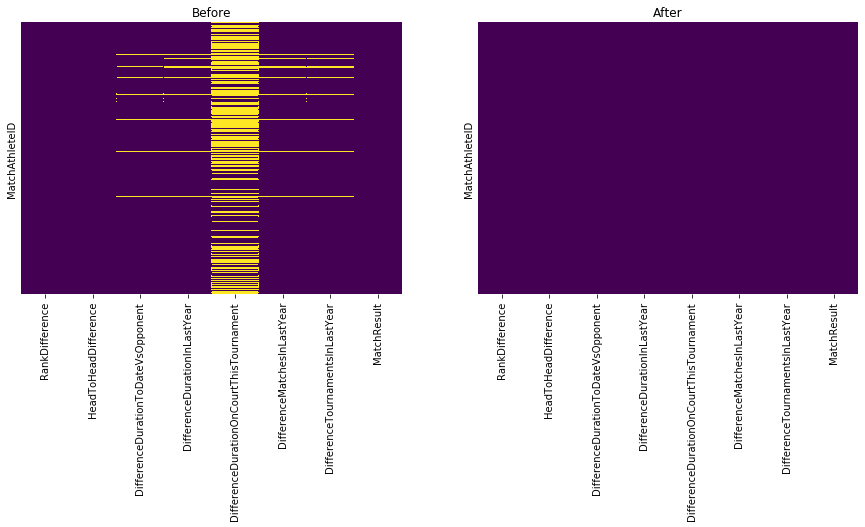

In [190]:
# identify any null data
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Before')

# fill the null values in Differences to 0
data = data.fillna(value = 0)

plt.subplot(1,2,2)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('After')

In [191]:
# Create dummies for categoric data
results = pd.get_dummies(data['MatchResult'],drop_first = True)
print(results.shape)
print(data.shape)

(22186, 1)
(22186, 8)


In [192]:
# Add dummy column to data and remove originals
data = pd.concat([data,results],axis=1)
data.drop('MatchResult',axis=1,inplace=True)
data.head()

,RankDifference,HeadToHeadDifference,DifferenceDurationToDateVsOpponent,DifferenceDurationInLastYear,DifferenceDurationOnCourtThisTournament,DifferenceMatchesInLastYear,DifferenceTournamentsInLastYear,Won
MatchAthleteID,,,,,,,,
128_P1,13,0,-3566.0,-1517.0,0.0,-33.0,-16.0,0
142_P1,11,0,-4695.0,-36.0,12.0,-4.0,5.0,0
168_P1,11,0,-7899.0,189.0,-3.0,3.0,1.0,0
183_P1,110,0,-6164.0,-1111.0,0.0,-20.0,-11.0,0
192_P1,588,0,-731.0,-312.0,0.0,-7.0,-6.0,0


# 2. Analyse data

## Exploration

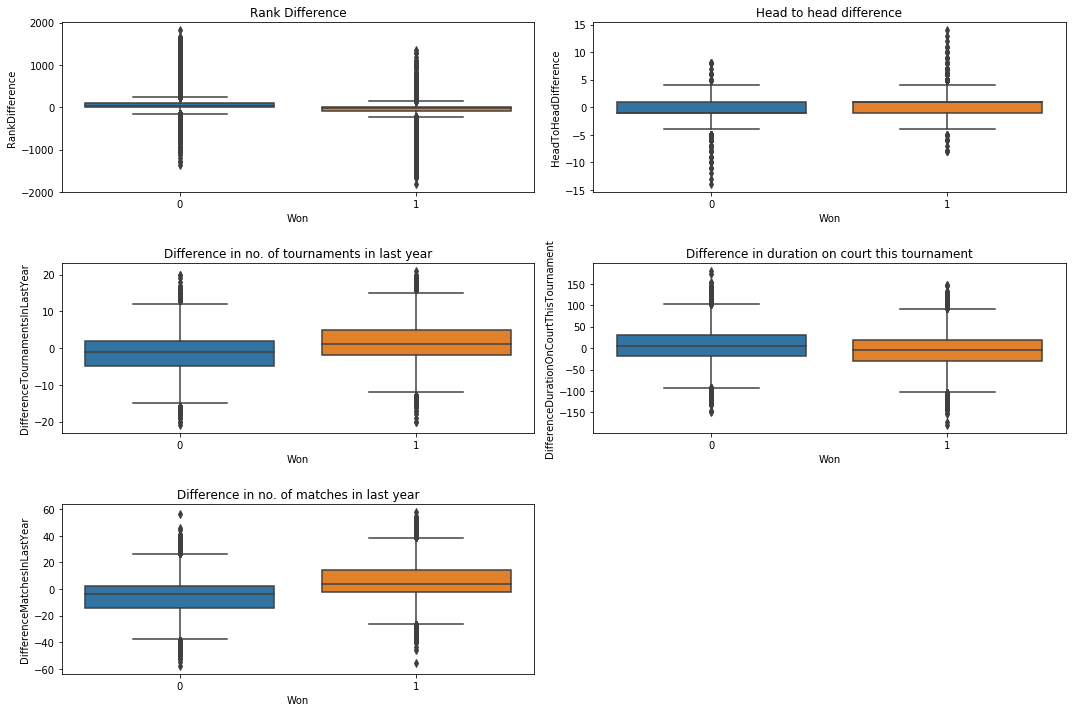

In [193]:
#Looking at spreads in data
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
sns.boxplot(x="Won", y="RankDifference", data=data)
plt.title('Rank Difference')

plt.subplot(3,2,2)
sns.boxplot(x="Won", y="HeadToHeadDifference", data=data.loc[data.HeadToHeadDifference!=0])
plt.title('Head to head difference')

plt.subplot(3,2,3)
sns.boxplot(x="Won", y="DifferenceTournamentsInLastYear", data=data)
plt.title('Difference in no. of tournaments in last year')

plt.subplot(3,2,4)
sns.boxplot(x="Won", y="DifferenceDurationOnCourtThisTournament", data=data.loc[data.DifferenceDurationOnCourtThisTournament!=0])
plt.title('Difference in duration on court this tournament')

plt.subplot(3,2,5)
sns.boxplot(x="Won", y="DifferenceMatchesInLastYear", data=data)
plt.title('Difference in no. of matches in last year')

plt.tight_layout()

## Average feature scores for match victories

In [194]:
a = pd.concat([data.loc[data.Won==1].mean(),data.loc[data.Won==1].median()],axis=1)
a.columns=['Mean','Median']
a

,Mean,Median
RankDifference,-73.346615,-19.0
HeadToHeadDifference,0.162535,0.0
DifferenceDurationToDateVsOpponent,917.252502,447.0
DifferenceDurationInLastYear,256.490670,186.0
DifferenceDurationOnCourtThisTournament,-2.940773,0.0
DifferenceMatchesInLastYear,5.421978,4.0
DifferenceTournamentsInLastYear,1.618408,1.0
Won,1.000000,1.0


## Correlation between fields

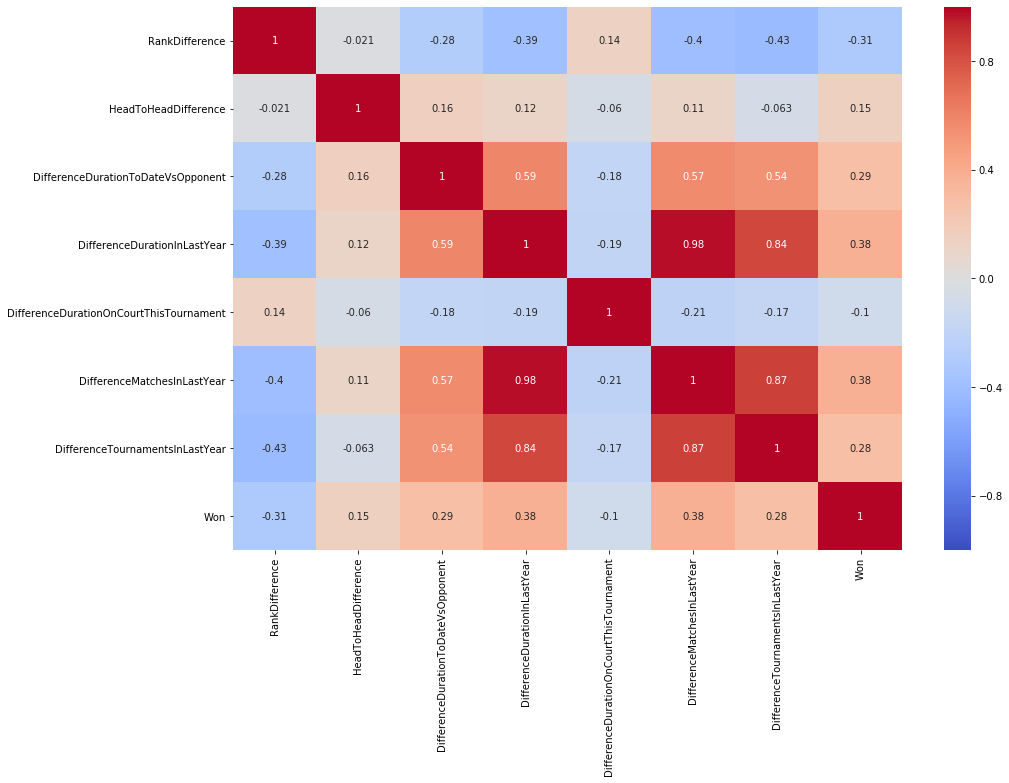

In [195]:
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), vmin = -1, vmax=1, annot=True, cmap="coolwarm")

# 3. Result predictions

In [196]:
# create a Python list of feature names
feature_cols = ['RankDifference', 'HeadToHeadDifference', 'DifferenceTournamentsInLastYear','DifferenceDurationOnCourtThisTournament']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,RankDifference,HeadToHeadDifference,DifferenceTournamentsInLastYear,DifferenceDurationOnCourtThisTournament
MatchAthleteID,,,,
128_P1,13,0,-16.0,0.0
142_P1,11,0,5.0,12.0
168_P1,11,0,1.0,-3.0
183_P1,110,0,-11.0,0.0
192_P1,588,0,-6.0,0.0


In [197]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(22186, 4)


In [198]:
# select the response series from the DataFrame
y = data.Won

# print the first 5 values
y.head()

MatchAthleteID
128_P1    0
142_P1    0
168_P1    0
183_P1    0
192_P1    0
Name: Won, dtype: uint8

In [199]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(22186,)


## 3-1. Logistic regression

### 3-1-1. Simple testing model

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [201]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16639, 4)
(16639,)
(5547, 4)
(5547,)


In [202]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg_1 = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg_1.fit(X_train, y_train)

# predict the response for new observations
y_pred = logreg_1.predict(X_test)
print(y_pred)

[0 1 0 ... 0 1 1]


In [203]:
# evaluation
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6563908418965206


### 3-1-2. Cross-fold validation

In [204]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

In [205]:
# 10-fold cross-validation
logreg = LogisticRegression(solver='lbfgs')
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores_logreg)

[0.68828829 0.68603604 0.66306306 0.68034265 0.70108206 0.76825969
 0.61316501 0.63300271 0.51532913 0.68440036]


In [206]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores_logreg.mean())

0.6632968992436983


### 3-1-3. Parameter tuning

#### Dropping single parameters

In [207]:
#Dropping individual features
testing_list = ['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']

X_temp = X
for col in testing_list:
    X_temp= X.drop(col,axis=1)
    if len(X_temp.columns)>0:
        scores_logreg_temp = cross_val_score(logreg, X_temp, y, cv=10, scoring='accuracy')
        print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_logreg_temp.mean(), scores_logreg_temp.std() * 2))

Dropping RankDifference - Accuracy: 0.631 (+/- 0.102)
Dropping HeadToHeadDifference - Accuracy: 0.638 (+/- 0.175)
Dropping DifferenceDurationOnCourtThisTournament - Accuracy: 0.664 (+/- 0.127)
Dropping DifferenceTournamentsInLastYear - Accuracy: 0.681 (+/- 0.140)


#### Other combinations

In [208]:
#Exhausting combinations of dropping features to check nothing is missed
testing_list = ['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']
scores_list = []
sd_list =[]
accomp_features_list = []

X_temp = X
for col in testing_list:
    X_temp= X.drop(col,axis=1)
    scores_logreg_temp = cross_val_score(logreg, X_temp, y, cv=10, scoring='accuracy')
    scores_list.append(scores_logreg_temp.mean())
    sd_list.append(scores_logreg_temp.std())
    accomp_features_list.append(col)
    #print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_logreg_temp.mean(), scores_logreg_temp.std() * 2))
    for col_2 in testing_list:
        X_temp_2 = X_temp
        if col != col_2:
            X_temp_2 = X_temp.drop(col_2,axis=1)
        if len(X_temp_2.columns)>0:
            scores_logreg_temp = cross_val_score(logreg, X_temp_2, y, cv=10, scoring='accuracy')
            scores_list.append(scores_logreg_temp.mean())
            sd_list.append(scores_logreg_temp.std())
            accomp_features_list.append([col,col_2])
            #print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_logreg_temp.mean(), scores_logreg_temp.std() * 2))
            
print("Complete")

Complete


In [209]:
feature_testing = pd.concat([pd.Series(accomp_features_list),pd.Series(scores_list),pd.Series(sd_list)],axis=1)
feature_testing.columns = (['FeaturesDropped','PredictionAccuracy','StandardDeviation'])
feature_testing.head(5)

,FeaturesDropped,PredictionAccuracy,StandardDeviation
0,RankDifference,0.630621,0.050970
1,"[RankDifference, RankDifference]",0.630621,0.050970
2,"[RankDifference, HeadToHeadDifference]",0.601992,0.076062
3,"[RankDifference, DifferenceDurationOnCourtThis...",0.629449,0.050815
4,"[RankDifference, DifferenceTournamentsInLastYear]",0.542966,0.073278


Max accuracy:
FeaturesDropped       [HeadToHeadDifference, DifferenceTournamentsIn...
PredictionAccuracy                                             0.684845
StandardDeviation                                             0.0499578
Name: 9, dtype: object


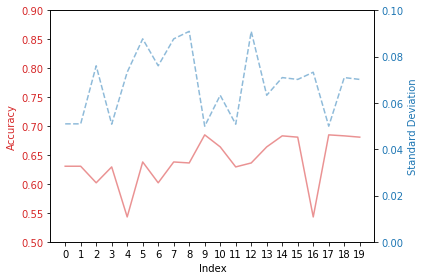

In [210]:
print('Max accuracy:')
print(feature_testing.iloc[feature_testing['PredictionAccuracy'].idxmax()])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(feature_testing.index, feature_testing.PredictionAccuracy, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.5,0.9])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Standard Deviation', color=color)  # we already handled the x-label with ax1
ax2.plot(feature_testing.index, feature_testing.StandardDeviation, color=color, ls='--', alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,0.1])

#Improving layout
plt.xticks(feature_testing.index)
fig.tight_layout()

## 3-2. K-Nearest neighbour

### 3-2-1. Scaling parameters

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
# Instantiate
scaler = StandardScaler()

In [213]:
# Computes mean and standard deviation required for later scaling
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [214]:
# Scales X
scaled_X_array = scaler.transform(X)
scaled_X_array

array([[ 0.05439809,  0.        , -2.81524919,  0.        ],
       [ 0.04602915,  0.        ,  0.87976537,  0.40835107],
       [ 0.04602915,  0.        ,  0.17595307, -0.10208777],
       ...,
       [ 0.17993215, -0.91481787,  0.17595307,  0.        ],
       [ 0.10461171, -0.91481787,  0.35190615,  0.        ],
       [ 0.10042725, -0.91481787,  0.        ,  0.        ]])

In [215]:
# Put into a pandas df
scaled_X = pd.DataFrame(scaled_X_array,columns=X.columns)
scaled_X.head(5)

,RankDifference,HeadToHeadDifference,DifferenceTournamentsInLastYear,DifferenceDurationOnCourtThisTournament
0,0.054398,0.0,-2.815249,0.000000
1,0.046029,0.0,0.879765,0.408351
2,0.046029,0.0,0.175953,-0.102088
3,0.460292,0.0,-1.935484,0.000000
4,2.460468,0.0,-1.055718,0.000000


In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, scaled_X, y, cv=10, scoring='accuracy')
print(scores_knn)
print(scores_knn.mean())

[0.66981982 0.64594595 0.63063063 0.6465284  0.65193868 0.68890893
 0.60324617 0.60054103 0.49594229 0.56627592]
0.619977782110334


In [218]:
# search for an optimal value of K for KNN
k_range = list(range(1, 201,20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5841933321960373, 0.6428741500743305, 0.6481476697617365, 0.6505809551661671, 0.6507163340075874, 0.6497234746017433, 0.64692893524724, 0.6470641516178035, 0.6464781598550761, 0.6481463699948822]


Text(0, 0.5, 'Cross-Validated Accuracy')

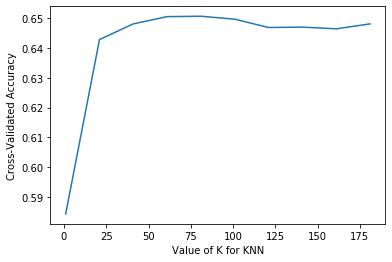

In [219]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Looks like K = ~100 is an appropriate value to use for decent performance

In [220]:
# search for an optimal value of K for KNN
k_range = list(range(1, 501,100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5841933321960373, 0.6497234746017433, 0.646162885157475, 0.6483284998253438, 0.6546841566544002]


Text(0, 0.5, 'Cross-Validated Accuracy')

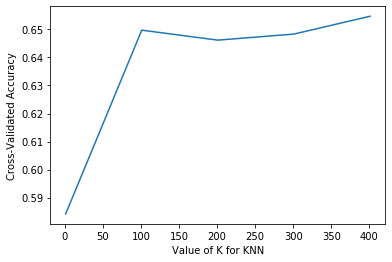

In [221]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [222]:
print(k_range)

[1, 101, 201, 301, 401]


In [223]:
print("Max predictive accuracy: " + str(max(k_scores)))
print("K-value: " + str(k_scores.index(max(k_scores))*100+1))

Max predictive accuracy: 0.6546841566544002
K-value: 401


### Parameter tuning

In [224]:
# Going to use 100 as a large K takes a long time to run and doesn't appear to be much benefit
knn_2 = KNeighborsClassifier(n_neighbors=100)

#### Single parameters

In [225]:
#Dropping individual features
testing_list = ['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']

X_temp = scaled_X
for col in testing_list:
    X_temp= scaled_X.drop(col,axis=1)
    if len(X_temp.columns)>0:
        scores_knn_temp = cross_val_score(knn_2, X_temp, y, cv=10, scoring='accuracy')
        print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_knn_temp.mean(), scores_knn_temp.std() * 2))

Dropping RankDifference - Accuracy: 0.614 (+/- 0.184)
Dropping HeadToHeadDifference - Accuracy: 0.676 (+/- 0.105)
Dropping DifferenceDurationOnCourtThisTournament - Accuracy: 0.666 (+/- 0.156)
Dropping DifferenceTournamentsInLastYear - Accuracy: 0.668 (+/- 0.131)


#### Multiple parameters

In [226]:
#Exhausting combinations of dropping features to check nothing is missed
testing_list = ['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']
scores_list = []
sd_list =[]
accomp_features_list = []

X_temp = scaled_X
for col in testing_list:
    X_temp= scaled_X.drop(col,axis=1)
    scores_knn_temp = cross_val_score(knn_2, X_temp, y, cv=10, scoring='accuracy')
    scores_list.append(scores_knn_temp.mean())
    sd_list.append(scores_knn_temp.std())
    accomp_features_list.append(col)
    #print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_logreg_temp.mean(), scores_logreg_temp.std() * 2))
    for col_2 in testing_list:
        X_temp_2 = X_temp
        if col != col_2:
            X_temp_2 = X_temp.drop(col_2,axis=1)
        if len(X_temp_2.columns)>0:
            scores_knn_temp = cross_val_score(knn_2, X_temp_2, y, cv=10, scoring='accuracy')
            scores_list.append(scores_knn_temp.mean())
            sd_list.append(scores_knn_temp.std())
            accomp_features_list.append([col,col_2])
            #print("Dropping %s - Accuracy: %0.3f (+/- %0.3f)" % (col, scores_logreg_temp.mean(), scores_logreg_temp.std() * 2))
            
print("Complete")

Complete


In [227]:
feature_testing = pd.concat([pd.Series(accomp_features_list),pd.Series(scores_list),pd.Series(sd_list)],axis=1)
feature_testing.columns = (['FeaturesDropped','PredictionAccuracy','StandardDeviation'])
feature_testing.head(5)

,FeaturesDropped,PredictionAccuracy,StandardDeviation
0,RankDifference,0.613535,0.091903
1,"[RankDifference, RankDifference]",0.613535,0.091903
2,"[RankDifference, HeadToHeadDifference]",0.583509,0.058040
3,"[RankDifference, DifferenceDurationOnCourtThis...",0.619665,0.085092
4,"[RankDifference, DifferenceTournamentsInLastYear]",0.538049,0.049962


Max accuracy:
FeaturesDropped       [HeadToHeadDifference, DifferenceDurationOnCou...
PredictionAccuracy                                             0.694673
StandardDeviation                                             0.0502262
Name: 8, dtype: object


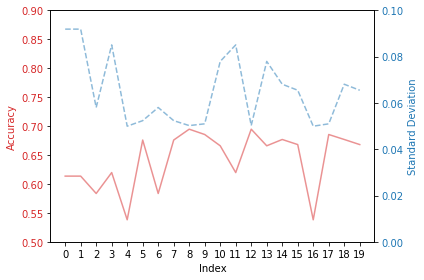

In [228]:
print('Max accuracy:')
print(feature_testing.iloc[feature_testing['PredictionAccuracy'].idxmax()])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(feature_testing.index, feature_testing.PredictionAccuracy, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.5,0.9])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Standard Deviation', color=color)  # we already handled the x-label with ax1
ax2.plot(feature_testing.index, feature_testing.StandardDeviation, color=color, ls='--', alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,0.1])

#Improving layout
plt.xticks(feature_testing.index)
fig.tight_layout()

With these features it's unlikely good predictive accuracy can be obtained, even with more complex models. The best accuracy this analysis has been able to reach is ~69%.